Importing the libraries required for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Reading the training dataset

In [2]:
train = pd.read_csv("train.csv")

Reading the testing dataset

In [3]:
test = pd.read_csv("test.csv")

In [4]:
test_final = test.copy()

Printing the test dataset

In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Printing the training dataset

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Printing the info method to check if there any null value present or not, chceking for the datatype of each column

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Printing how many null values are present and the percentage of null values present in the dataset if it more than 70% we will drop that column

In [8]:
data = pd.DataFrame(train.isnull().sum(), columns=['Sum'])
data['Percentage'] = (train.isnull().sum()/891)*100
data

,Sum,Percentage
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


So Cabin  column has more than 70% null values so we will drop that column

To see the overall statistics of the dataset we are using the describe function which will tell the count of non null rows present, mean of eac column, standard Deviation, minimum Value, 25 percentile, 50 percentile, 75 percentile and Maximum value.

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dropping the columns which are not required for the model building from both training dataset and testing dataset

In [10]:
train.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Fare'], axis= 1, inplace=True)
test.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Fare'], axis= 1, inplace=True)

Printing the percentage of male and female present in the dataset

In [11]:
perc = ((train['Sex'].value_counts())/len(train))*100
print('percentage of gender:\n',perc)

percentage of gender:
 male      64.758698
female    35.241302
Name: Sex, dtype: float64


After removing all the unnecessary features printing the dataset

In [12]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
5,0,3,male,NaN,0,0,Q
6,0,1,male,54.0,0,0,S
7,0,3,male,2.0,3,1,S
8,1,3,female,27.0,0,2,S
9,1,2,female,14.0,1,0,C


Now  replacing the null values to here we used to technique to replace all the null values within a paricular range that is from mean-(minus)std to mean+std so that the normal distribution is maintained.

In [13]:
dataset = [train, test]

for data1 in dataset:
    avg = data1['Age'].mean()
    std = data1['Age'].std()
    isnull = data1['Age'].isnull().sum()
    rand_age = np.random.randint(avg-std, avg+std, size=isnull)
    age_1 = data1['Age'].copy()
    age_1[np.isnan(age_1)] = rand_age
    data1['Age'] = age_1

Converting datatype of age to integer from float

In [14]:
train['Age'].astype(int)
test['Age'].astype(int)

0      34
1      47
2      62
3      27
4      22
       ..
413    30
414    39
415    38
416    25
417    37
Name: Age, Length: 418, dtype: int64

Null value also present in the Embarked feature so replacing it with mode value

In [15]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [16]:
common = 'S'
train['Embarked'] = train['Embarked'].fillna(common)
test['Embarked'] = test['Embarked'].fillna(common)

Now again we are checking if any null value is present or not

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


So here we are merging the sibling spouse column and parents childern column to Familysize column

In [18]:
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

After merging the sibling spouse column and parent children column now deleting those column

In [19]:
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

Creating barplot between the passenger class and survived to check is any relationship is present between them

<Axes: xlabel='Pclass', ylabel='Survived'>

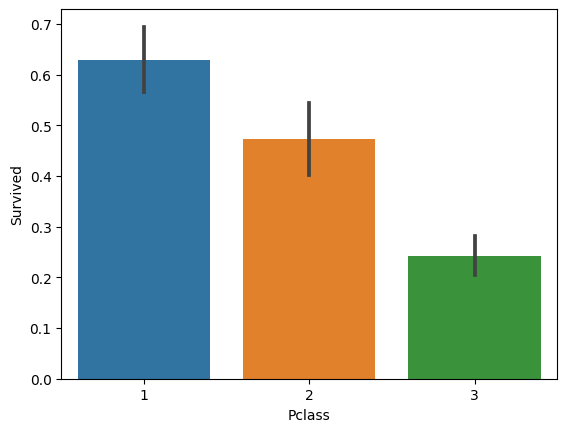

In [20]:
sns.barplot(x='Pclass', y='Survived', data=train)

As we can see that the person who was travelling in the first class has survived the most as compared to other classes.

Creating a catplot between gender and survived and checking is there any relationship is present between them

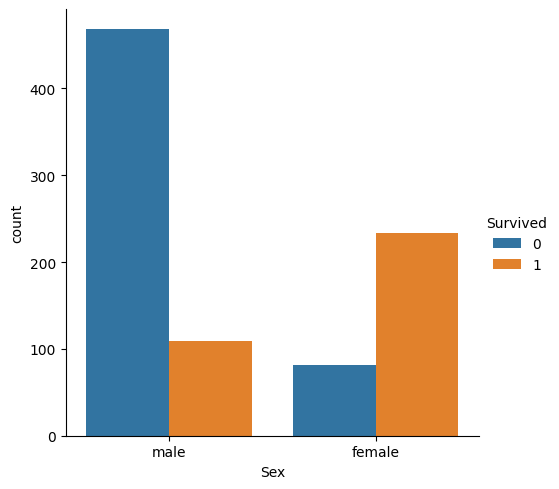

In [21]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = train)

So we can see that the survival rate is female is more than male

Creating a facetgrid between passenger class survived and age and checking any relationship is present between them

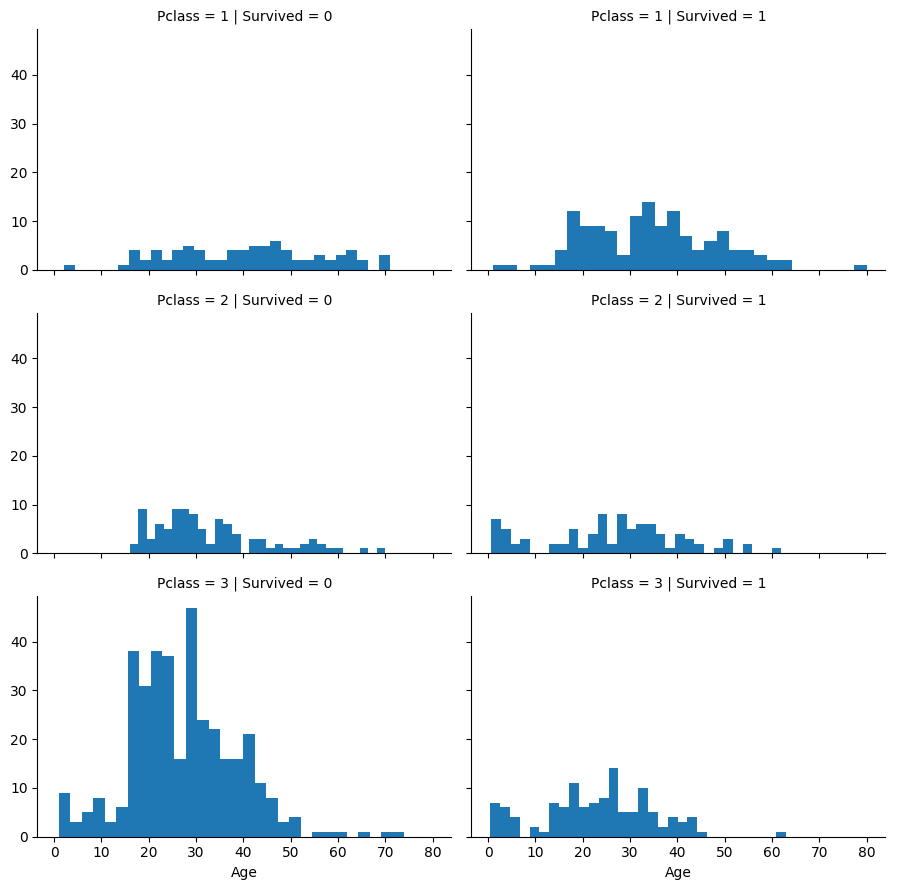

In [22]:
c = sns.FacetGrid(train, col='Survived' , row='Pclass', aspect=1.5)
c.map(plt.hist, 'Age', bins=30)
c.add_legend();

The person who were travelling in passenger class 3 has died the most.


Creating a facetgrid for the gender survived and the age column

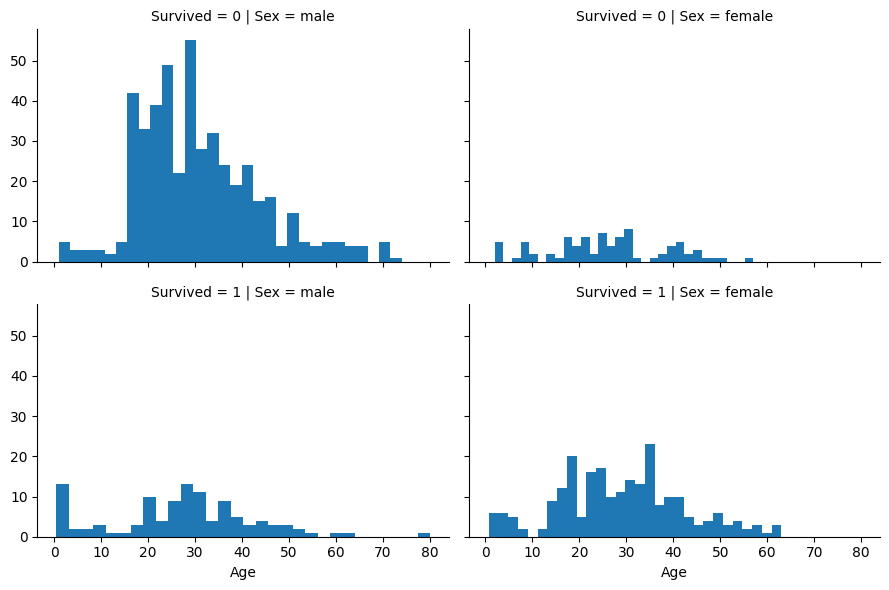

In [23]:
Gender = sns.FacetGrid(train, col='Sex', row='Survived', aspect=1.5)
Gender.map(plt.hist, 'Age', bins=30)

Survival rate of female is more as compared to men

The men who all are survived are between the age of 0-30

Also checking any relationship is present in the survival of the passenger based on the port from which they are broaded.

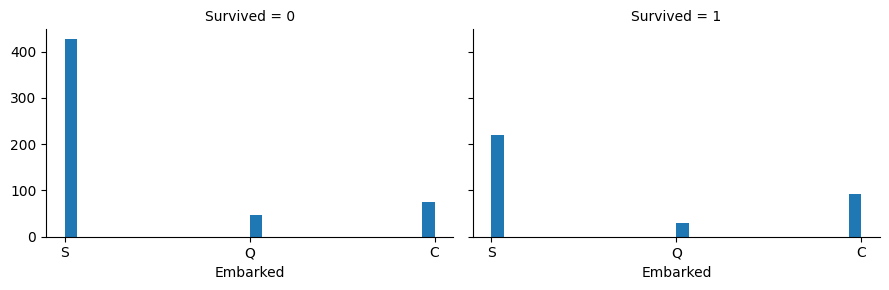

In [24]:
port = sns.FacetGrid(train, col='Survived', aspect=1.5)
port.map(plt.hist, 'Embarked', bins=30)

Also checking based on the family size is there are chances of survival means is the man has broaded the rescue boat there might chances that their family is alsp with them


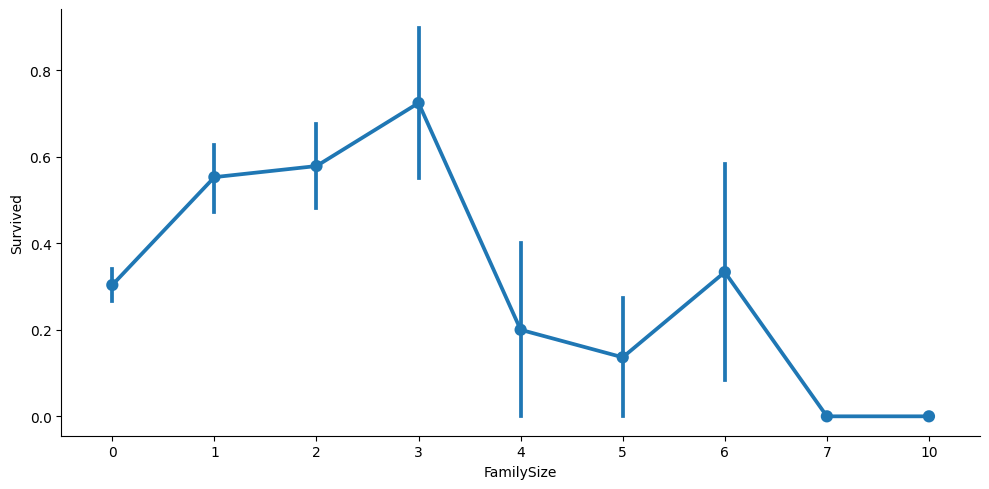

In [25]:
axes = sns.catplot(x='FamilySize', y='Survived', data = train, kind='point', aspect=2)

Checking for the corelation between the features

Doing the label encodeing for the Sex and embarked colummn

In [26]:
label_encoder = preprocessing.LabelEncoder()

for i in train:
    train[i] = label_encoder.fit_transform(train[i])
for i in test:
    test[i] = label_encoder.fit_transform(test[i])

Checking the dataset after doing the label encoding

In [27]:
train

,Survived,Pclass,Sex,Age,Embarked,FamilySize
0,0,2,1,28,2,1
1,1,0,0,51,0,1
2,1,2,0,34,2,0
3,1,0,0,47,2,1
4,0,2,1,47,2,0
...,...,...,...,...,...,...
886,0,1,1,35,2,0
887,1,0,0,24,2,0
888,0,2,0,56,2,3
889,1,0,1,34,0,0


Checking the dataset after doing the label encoding

In [28]:
test

,Pclass,Sex,Age,Embarked,FamilySize
0,2,1,44,1,0
1,2,0,60,2,1
2,1,1,74,1,0
3,2,1,34,2,0
4,2,0,27,2,2
...,...,...,...,...,...
413,2,1,38,2,0
414,0,0,51,0,0
415,2,1,50,2,0
416,2,1,31,2,0


Handling the outliers if any outliers are present or not, we are handling the outliers because if we not handled them, then the model gets baised towards the outliers and the accuracy of the model decreases

so creaating a box plot to detect the outliers are present or not

In [29]:
train_col = train.columns
test_col = test.columns

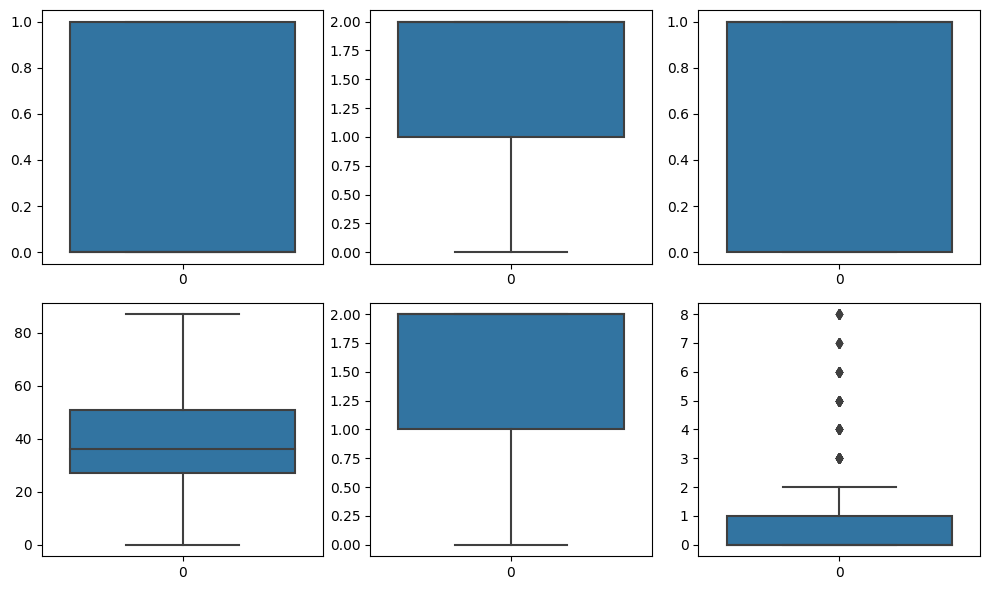

In [30]:
plt.figure(figsize=[10, 6])
cnt = 1
for col in train_col:
    plt.subplot(2, 3, cnt)
    sns.boxplot(train[col])
    cnt += 1
plt.tight_layout()
plt.show()

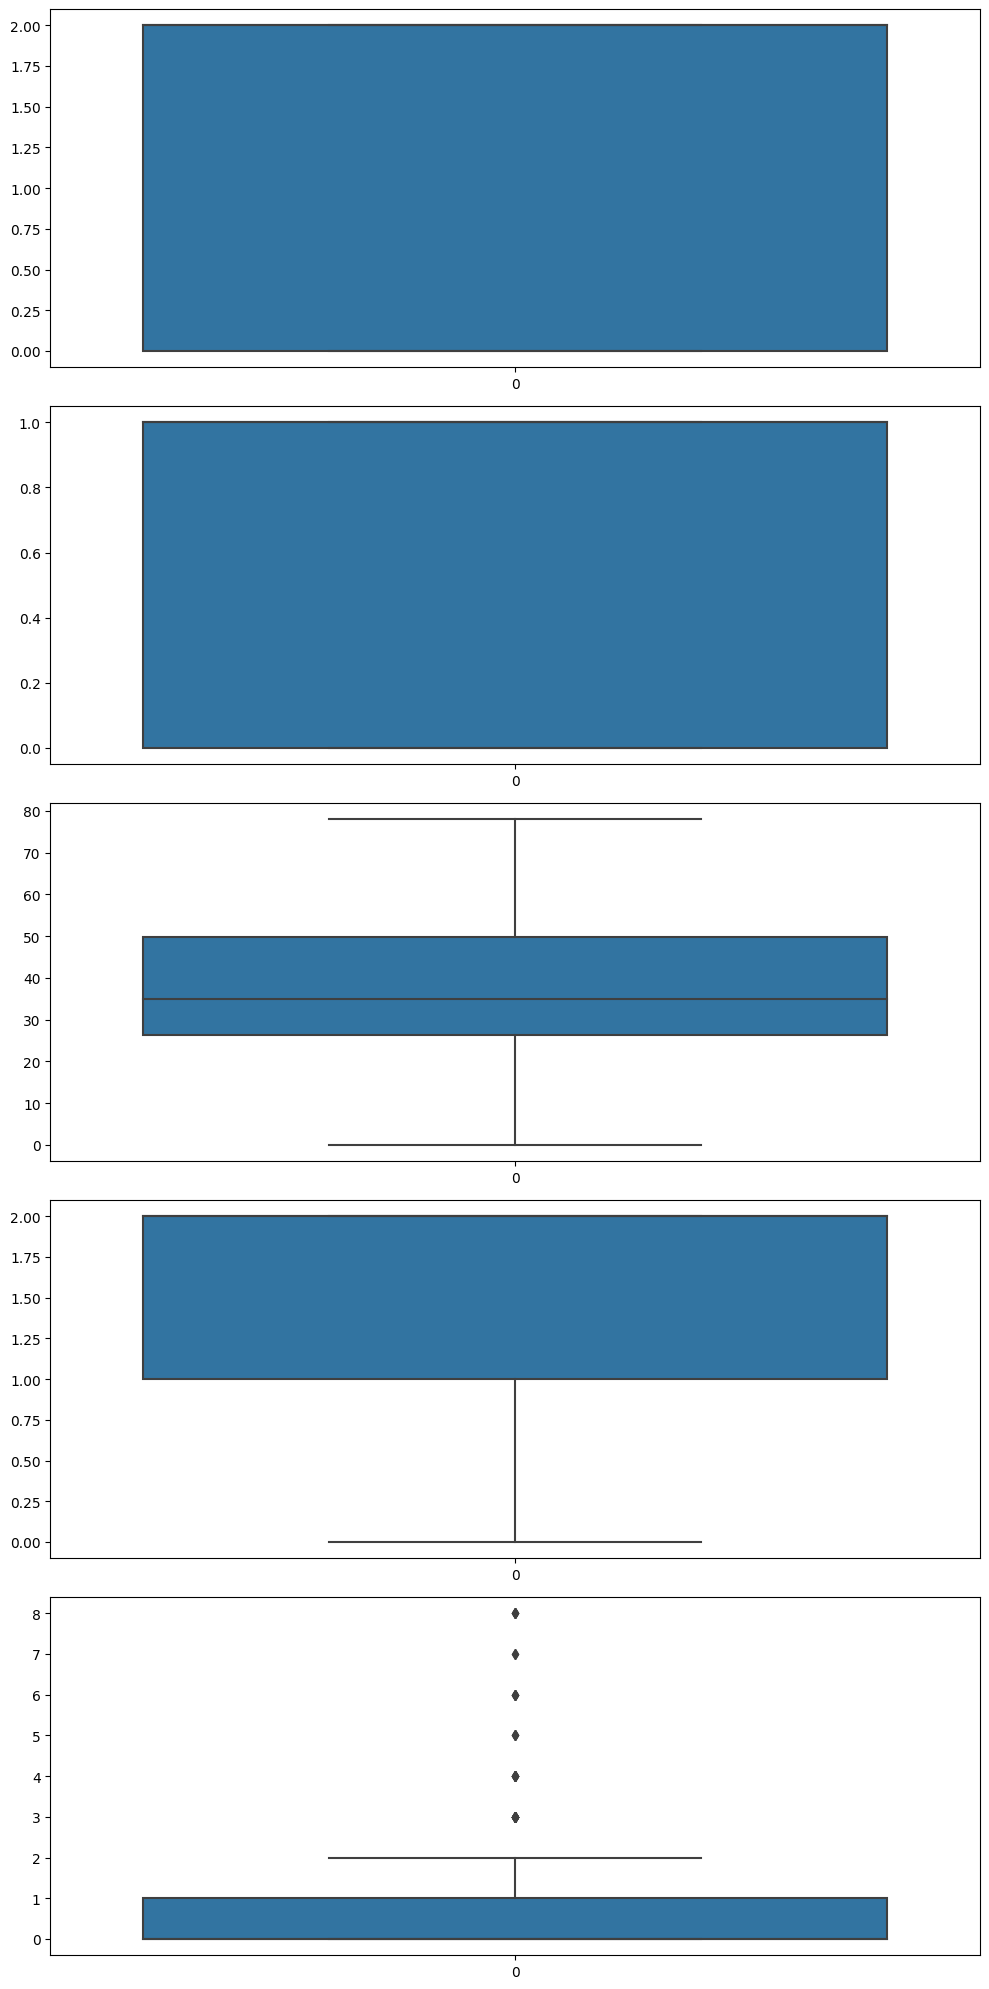

In [31]:
plt.figure(figsize=[10, 20])
cnt = 1
for col in test_col:
    plt.subplot(5, 1, cnt)
    sns.boxplot(test[col])
    cnt += 1
plt.tight_layout()
plt.show()

As outliers are very less so we will handle those outliers

Handling the outliers

In [32]:
def outlier_thresholds(data, variable):
    quartile1 = data[variable].quantile(0.25)
    quartile3 = data[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


for col in train_col:
    low_limit, up_limit = outlier_thresholds(train, col)
    train.loc[(train[col] < low_limit), col] = train[col].mean()-train[col].std()
    train.loc[(train[col] > up_limit), col] = train[col].mean()+train[col].std()

In [33]:
def outlier_thresholds(data, variable):
    quartile1 = data[variable].quantile(0.25)
    quartile3 = data[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


for col in test_col:
    low_limit, up_limit = outlier_thresholds(test, col)
    test.loc[(test[col] < low_limit), col] = test[col].mean()-test[col].std()
    test.loc[(test[col] > up_limit), col] = test[col].mean()+test[col].std()

Now checking if outliers are handled or not

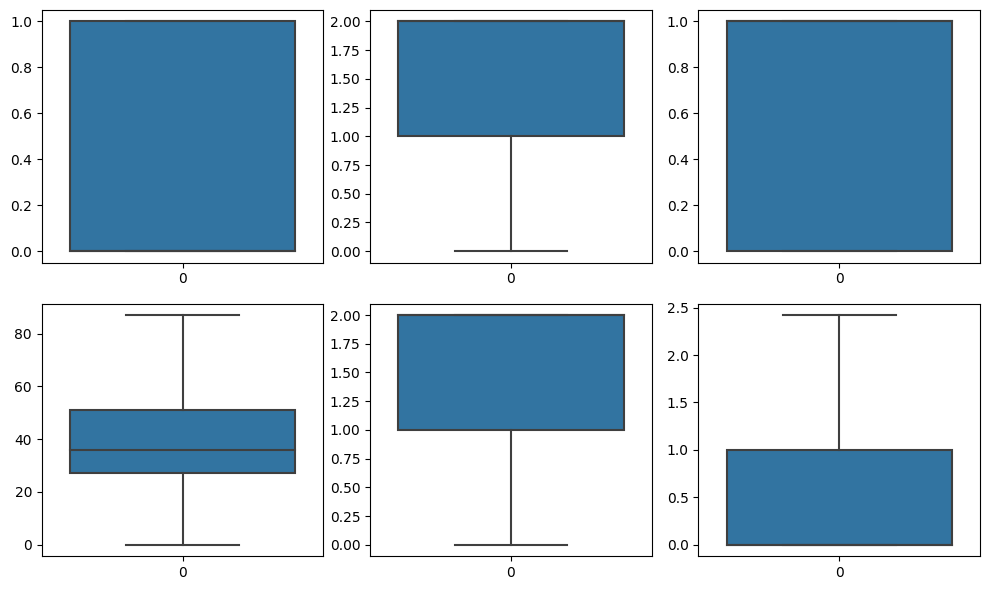

In [34]:
plt.figure(figsize=[10, 6])
cnt = 1
for col in train_col:
    plt.subplot(2,3, cnt)
    sns.boxplot(train[col])
    cnt += 1
plt.tight_layout()
plt.show()

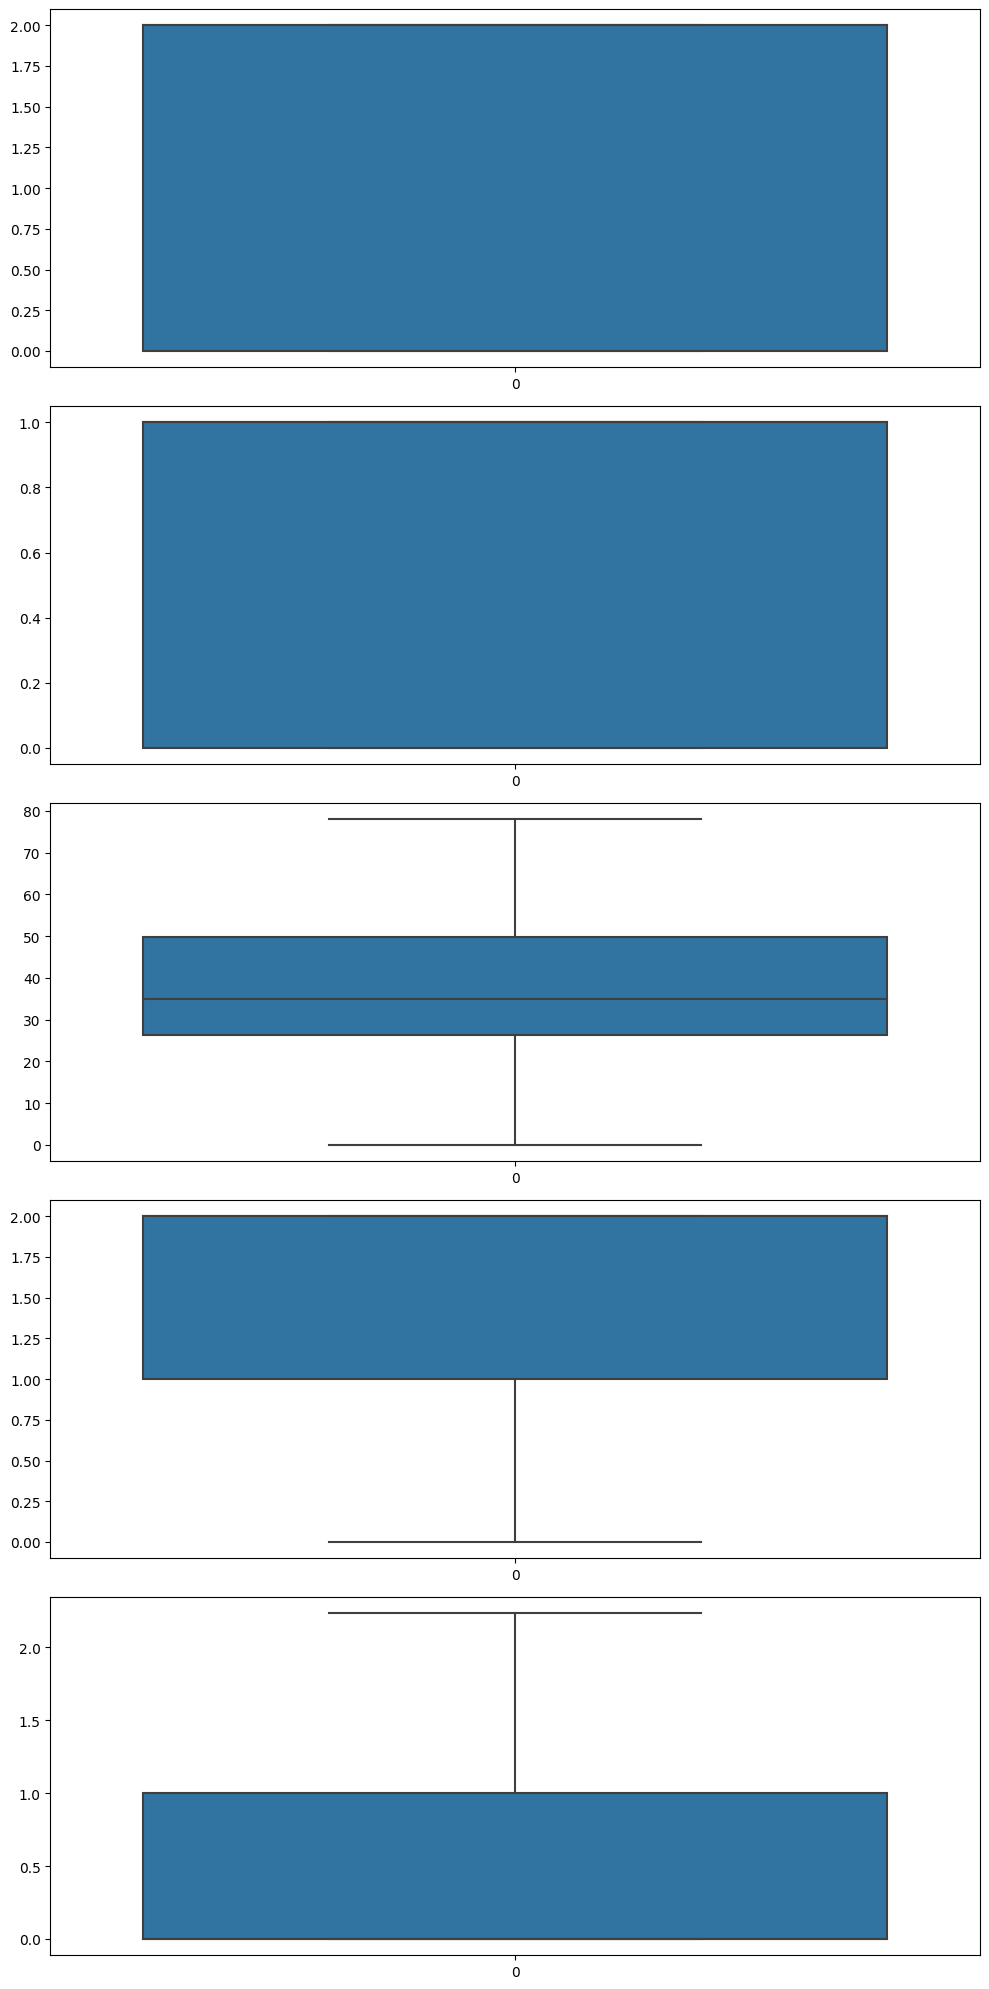

In [35]:
plt.figure(figsize=[10, 20])
cnt = 1
for col in test_col:
    plt.subplot(5, 1, cnt)
    sns.boxplot(test[col])
    cnt += 1
plt.tight_layout()
plt.show()

As you can see that the outiers are handled

<Axes: >

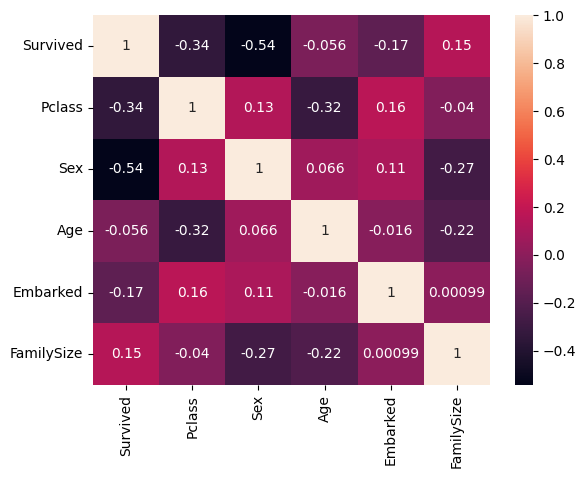

In [36]:
corr = train.corr()
sns.heatmap(corr, annot=True)

Selecting the independent features and dependent features

In [37]:
x = train.iloc[:, 1:].values
y = train.iloc[:, :1].values

checking the shape of the dataset

In [38]:
x.shape, y.shape

((891, 5), (891, 1))

Scaling the dataset as the data is spread in different ranges so bringing them in one range

In [39]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [40]:
test = scaler.fit_transform(test)

spliiting the dataset into training and testing data

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1, test_size=0.2)

Creating the models for differnet  algorithms

In [42]:
models = {}

models['Logistic Regression'] = LogisticRegression()

models['RBF SVC'] = SVC(kernel='rbf')
models['Polynomial SVC'] = SVC(kernel='poly')

models['Decision Tree'] = DecisionTreeClassifier()

models['Random Forest'] = RandomForestClassifier(n_estimators = 100)

Calculating the model score and accuracy of the model for differnet algorithms

In [43]:
accuracy = {}
model_score = {}

for key in models.keys():
    # Fit the classifier
    models[key].fit(x_train, y_train)

    # Make predictions
    predictions = models[key].predict(x_test)

    # model score
    model_score[key] = models[key].score(x_train, y_train)

    # Calculate metrics
    accuracy[key] = accuracy_score(y_test, predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-43-9126f6da8614>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  models[key].fit(x_t

Creating the confusion matrix for all the algorithms used


 Logistic Regression  Values Predicted Correctly:  141  and Values predicted incorretly:  38 



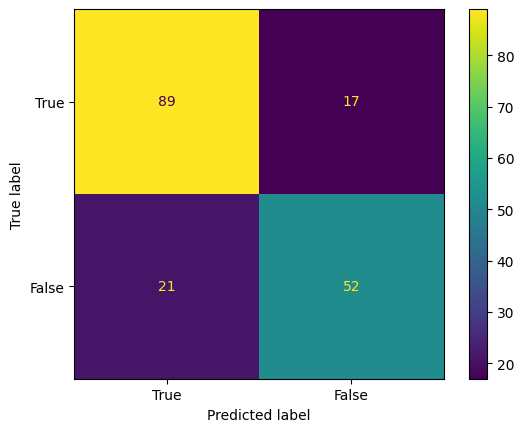


 RBF SVC  Values Predicted Correctly:  139  and Values predicted incorretly:  40 



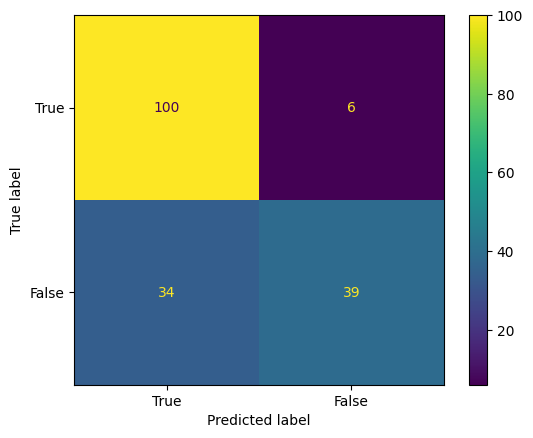


 Polynomial SVC  Values Predicted Correctly:  142  and Values predicted incorretly:  37 



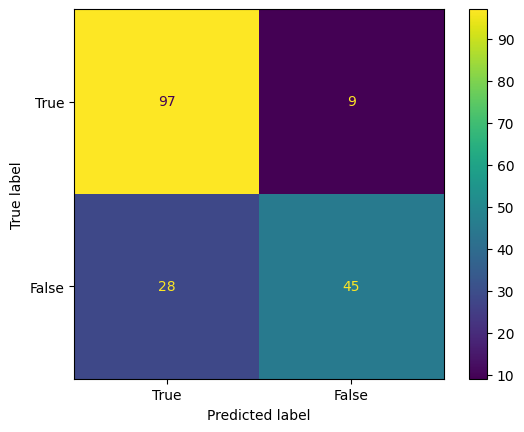


 Decision Tree  Values Predicted Correctly:  136  and Values predicted incorretly:  43 



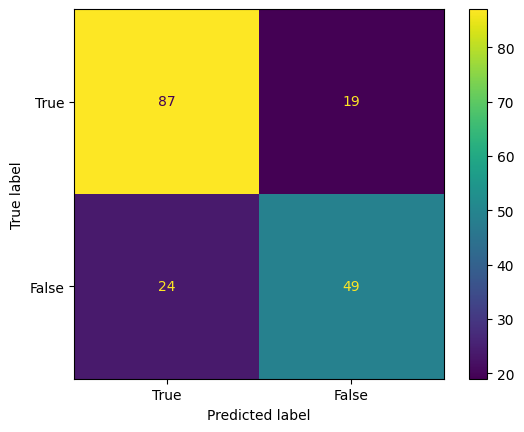


 Random Forest  Values Predicted Correctly:  131  and Values predicted incorretly:  48 



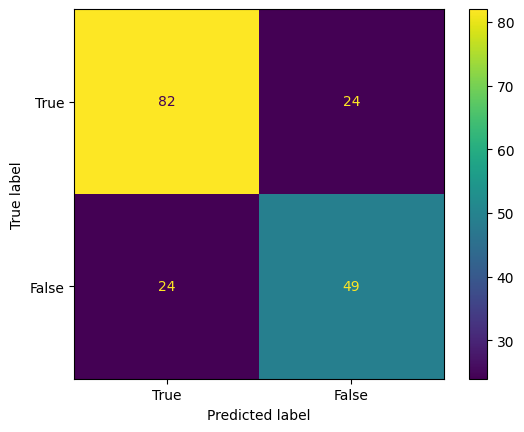

In [44]:
for key in models.keys():
    # creating confusion metric for all model
    predictions = models[key].predict(x_test)
    confusion_matrix = metrics.confusion_matrix(y_test, predictions)
    print('\n',key," Values Predicted Correctly: ", confusion_matrix[0][0]+confusion_matrix[1][1]," and Values predicted incorretly: ",confusion_matrix[0][1]+confusion_matrix[1][0],"\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
    cm_display.plot()
    plt.show()

Printing the model score and accuracy of the Different ML Alorithms

In [45]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Model Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Model Score'] = model_score.values()
df_model

,Accuracy,Model Score
Logistic Regression,0.787709,0.783708
RBF SVC,0.776536,0.846910
Polynomial SVC,0.793296,0.830056
Decision Tree,0.759777,0.955056
Random Forest,0.731844,0.955056


Decision tree and Random Forest has the best model score but accuracy score of Polynomial SVC is good

As Decision tree has Best model score so we are predicting the values for the test dataset

In [46]:
x_test = test
predict = models['Decision Tree'].predict(x_test)

In [47]:
test_final['Survived'] = predict.astype(int)

So here the final dataset of the test dataset and predicted the value based on the decision trea classifier

In [48]:
test_final

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
